In [24]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

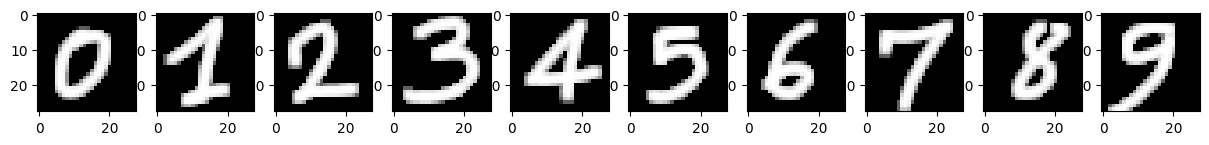

In [25]:
#loading dataset

from PIL import Image
import os

data_list = []
for i in range(10):
    digit_filename = 'img/'+str(i)+'.png'
    digit_in = Image.open(digit_filename).convert('L')
    ydim, xdim = digit_in.size
    #print("Image size: "+str(xdim)+"x"+str(ydim))
    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for k in range(xdim):
            data[k,j]=pix[j,k]
    data/= 255
    data_list.append(data)


test = np.array(data_list)  #converting the list in a np array
test=test.reshape(10,xdim,ydim,1) #reshaping it to fit the input type for the DCNN model

plt.figure(figsize=(15,4))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(test[i, :, :, 0], cmap='gray')
plt.show()

In [26]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

# reshaping for Convolutional Neural Networks
from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000,)

60000 train samples
10000 test samples


In [27]:
#CNN archiutecture
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D

def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))

    model.add(MaxPool2D(pool_size=(3,3),strides=1))
    
    model.add(Conv2D(10, kernel_size=(5, 5), activation='relu'))
    
    model.add(Flatten())
    
    model.add(Dense(20,activation='relu'))
    model.add(Dense(20,activation='relu'))
    
    model.add(Dropout(0.5))
    
    model.add(Dense(num_classes,activation='softmax')) #soft-max layer with num_classes=10 possible outputs
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['acc'])
    return model

In [28]:
# training parameters
batch_size = 32
epochs = 3

# create the deep conv net
model_CNN=create_CNN()

# train CNN
history = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaliate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - acc: 0.3935 - loss: 1.6431 - val_acc: 0.9174 - val_loss: 0.3175
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - acc: 0.7455 - loss: 0.6961 - val_acc: 0.9639 - val_loss: 0.1430
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - acc: 0.8001 - loss: 0.5233 - val_acc: 0.9755 - val_loss: 0.0880
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9669 - loss: 0.1119

Test loss: 0.08803833276033401
Test accuracy: 0.9754999876022339


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


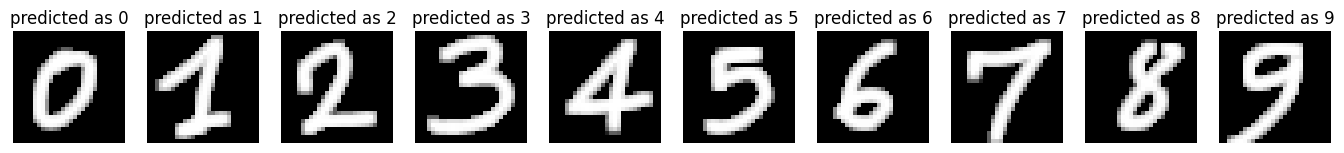

In [29]:
#prediction
predictions = model_CNN.predict(test)
target = np.arange(10)

#img_rows, img_cols = 28
##test = test.reshape(test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(17, 5)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(test[i, :, :, 0], cmap='gray')    
    plt.title( 'predicted as '+str(np.argmax(predictions[i])))   
    plt.axis('off') 
plt.show()